# Построение графика по витрине продаж в разрезе месяцев

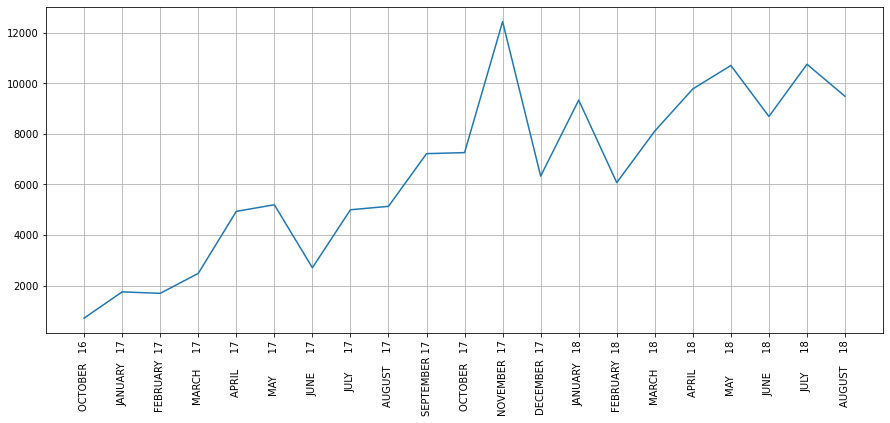

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as adb
import cx_Oracle as ora
from sqlalchemy import * 
from sqlalchemy_utils import *

# подключение к oracle
l_user = 'cherenkov_ss'
l_pass = open(r'D:\DE\REBOOT_DE2\pass.txt', 'r').read() 
l_tns = ora.makedsn('13.95.167.129', 1521, service_name = 'pdb1')

l_conn_ora = adb.create_engine(r'oracle://{p_user}:{p_pass}@{p_tns}'.format(
    p_user = l_user
    , p_pass = l_pass
    , p_tns = l_tns
    )
    )
l_meta = MetaData(l_conn_ora)
l_meta.reflect()
l_tables = l_meta.tables['vitrina_slice_month_orders']
l_vitr = l_tables.select().execute()

df =    pd.DataFrame(l_vitr)
df = df.rename(columns={0: 'SLICE_MONTH', 1: 'SUMMA_ZAKAZOV'}) 

plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
plt.grid(axis = 'both')
plt.plot(df['SLICE_MONTH'],df['SUMMA_ZAKAZOV'])
plt.show()